<a href="https://colab.research.google.com/github/neillinehan/NeilLinehanPortfolio/blob/main/Physics%20Models/L2_CompactSpectrometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#2

In [ ]:
ls = pd.read_csv('/content/L2_ CompactSpectrometer  - LaserSpots (1).csv',index_col=0)

In [ ]:
!pip install scienceplots

In [ ]:
import scienceplots

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.style.use(['science','no-latex'])

In [ ]:
import scipy

In [ ]:
peaks = []
FWHMs = []
properties = []
for col in ls:
  peak,propertys = scipy.signal.find_peaks(ls[col],prominence=.1,width = 2)
  peaks.append(peak)
  properties.append(propertys)
  FWHMs.append(scipy.signal.peak_widths(ls[col],peak))

In [ ]:
import numpy as np

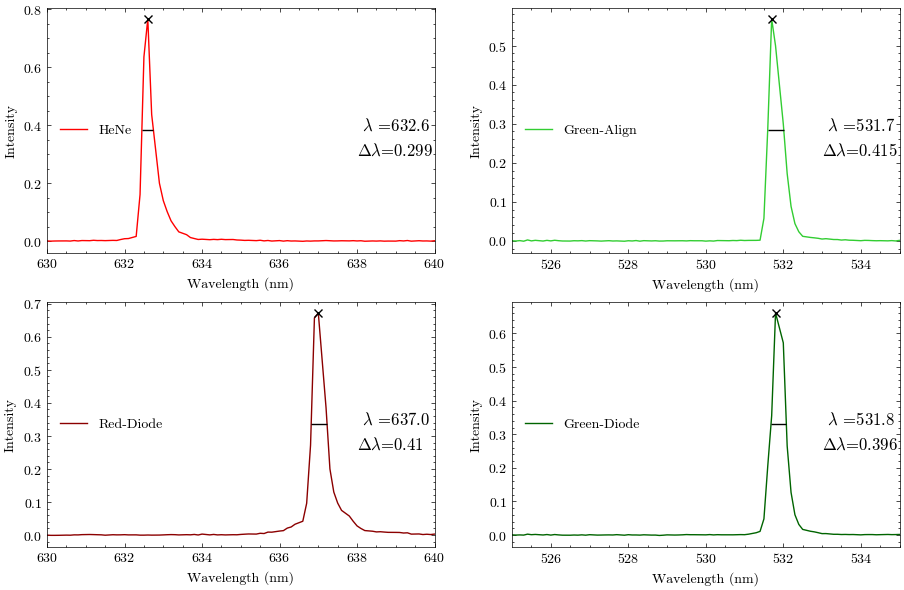

In [ ]:
axes = ls.plot(subplots=True,layout=(2,2),figsize=(11,7),sharex=False,color=['red','limegreen','darkred','darkgreen'])
xlims = [[630,640],
         [525,535],[630,640],
         [525,535],]
for i,ax in enumerate(axes.flatten()):
  ax.set_xlim(xlims[i])
  x = ls.iloc[:,i]
  #ax.plot(x)
  ax.plot(x.iloc[peaks[i]], "x",color='black')
  lmax = np.interp(properties[i]["right_ips"], np.arange(len(x.index)), x.index)
  lmin = np.interp(properties[i]["left_ips"], np.arange(len(x.index)), x.index)
  ax.hlines(y=properties[i]["width_heights"], xmin=lmin,
           xmax=lmax, color = "black")
  ax.annotate(' $\lambda$ ='+str(x.iloc[peaks[i]].index[0]),xy=(.8,.5),xycoords='axes fraction',fontsize=12)
  ax.annotate('$\Delta\lambda$='+str(round((lmax-lmin)[0],3)),xy=(.8,.4),xycoords='axes fraction',fontsize=12)
  ax.legend(loc='center left')
  ax.set_xlabel('Wavelength (nm)')
  ax.set_ylabel('Intensity')

axes[0,0].get_figure().savefig("laserplots.png",dpi=600)

#3

In [ ]:
ls_nolase = pd.read_csv('/content/L2_ CompactSpectrometer  - Lase-NoLase.csv',index_col=0)

In [ ]:
ls_nolase = ls_nolase.clip(lower=0)

In [ ]:
ls_nolase['diff'] = (ls_nolase.diff(axis=1))['NoLase'].clip(upper=0)*-1

In [ ]:
ls_nolase['pc_diff'] =(ls_nolase.pct_change(axis=1))['NoLase'].clip(upper=1)*-1

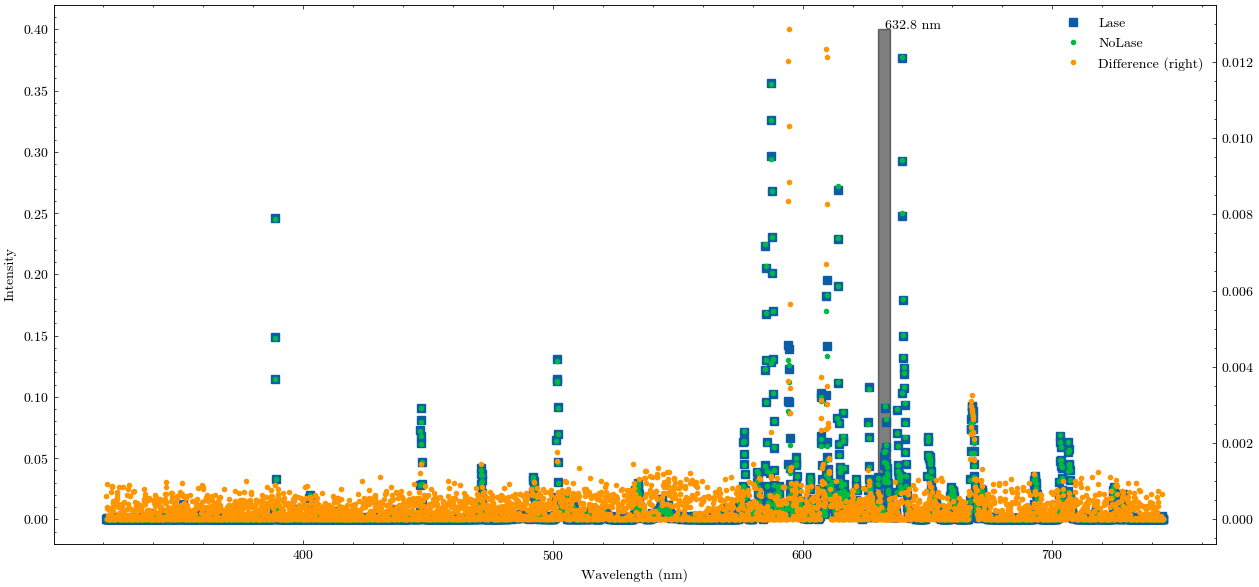

In [ ]:
ls_nolase['Lase'].plot(linewidth=1,style='s',legend=True,alpha=1)
ax = ls_nolase['NoLase'].plot(figsize=(15,7),style='.',legend=True)

ls_nolase['diff'].plot(secondary_y=True,label='Difference',legend=True,style='.')


#ax.set_yscale('log')
ax.set_ylabel('Intensity')
ax.set_xlabel('Wavelength (nm)')

ax.fill_betweenx([0,.4],x1=[635],x2=630,color='black',alpha=.5)
ax.annotate('632.8 nm',xy=(632.8,.4))
ax.get_figure().savefig('lase_nolase_neg_dif.png',dpi=600)